In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [ ]:
# Read in dataset
df = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%204/Data/all_5years.csv")
df.head()

In [214]:
# There are 2 classes: 0 and 1 - dtype is int!
print(df.groupby(['class'])['class'].count())

class
b'0'    41314
b'1'     2091
Name: class, dtype: int64


In [215]:
# Map class to 0 and 1
class_dict = {b'0': '0', b'1': '1'}

df['class'] = df['class'].map(class_dict)
print(df.groupby(['class'])['class'].count())

class
0    41314
1     2091
Name: class, dtype: int64


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [217]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [218]:
df_std = df.describe().iloc[[2]]
df_std = df_std.T
df_std.reset_index(inplace=True)

<AxesSubplot:xlabel='index', ylabel='std'>

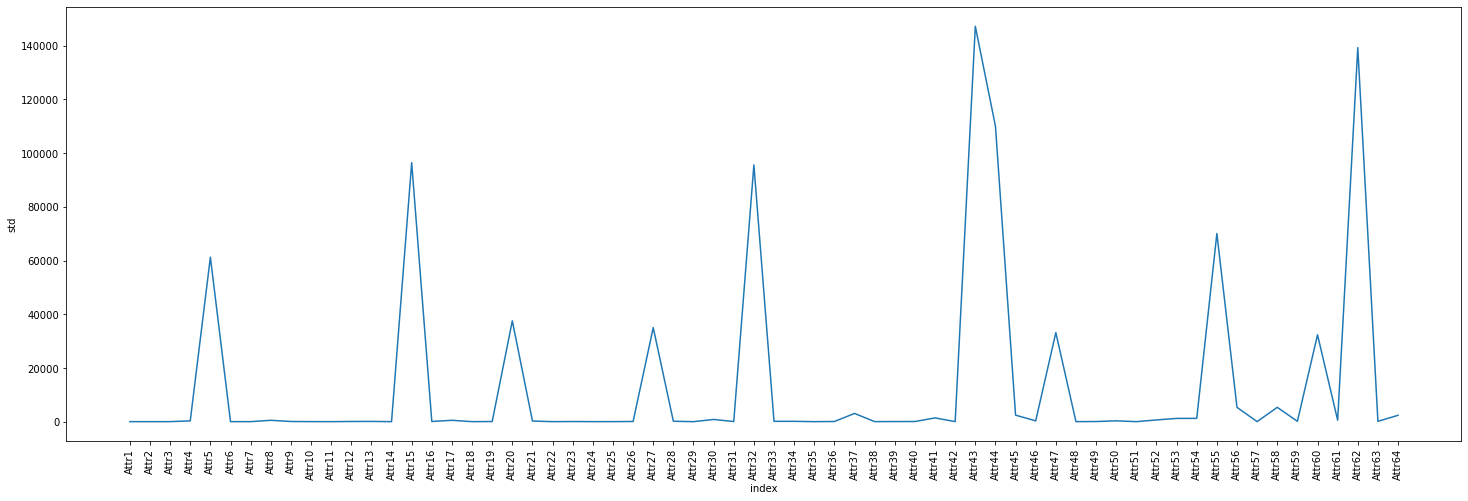

In [219]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)

sns.lineplot(x="index", y="std", data=df_std)

In [220]:
outlier_stats = df_std[ df_std["std"]> 20000].reset_index(drop=True)
outlier_ft_list = list(outlier_stats["index"])

In [221]:
outlier_df = df[outlier_ft_list]
outlier_df.describe()

,Attr5,Attr15,Attr20,Attr27,Attr32,Attr43,Attr44,Attr47,Attr55,Attr60,Attr62
count,4.331600e+04,4.336900e+04,4.327800e+04,4.064100e+04,4.303700e+04,4.327800e+04,4.327800e+04,4.310800e+04,4.340400e+04,4.125300e+04,4.327800e+04
mean,-3.853466e+02,1.991890e+03,2.430209e+02,1.107896e+03,1.162621e+03,1.074125e+03,8.311085e+02,3.578418e+02,7.672188e+03,4.480858e+02,1.502328e+03
std,6.124303e+04,9.643193e+04,3.754517e+04,3.501237e+04,9.559356e+04,1.472188e+05,1.100510e+05,3.314634e+04,7.005310e+04,3.234560e+04,1.392667e+05
min,-1.190300e+07,-9.632400e+06,-2.934000e+01,-2.590100e+05,-9.295600e+03,-1.158700e+05,-1.158700e+05,-9.611000e+01,-1.805200e+06,-1.244000e+01,-2.336500e+06
25%,-4.908000e+01,2.225800e+02,1.541325e+01,4.504800e-02,4.639500e+01,6.660850e+01,3.487775e+01,1.622575e+01,2.755425e+01,5.545500e+00,4.214400e+01
50%,-1.034500e+00,8.462600e+02,3.514950e+01,1.084100e+00,7.832500e+01,9.940150e+01,5.476750e+01,3.812950e+01,1.088350e+03,9.791700e+00,7.132600e+01
75%,5.063425e+01,2.226900e+03,6.372275e+01,5.139300e+00,1.280800e+02,1.406975e+02,8.052250e+01,7.033950e+01,4.993325e+03,2.018100e+01,1.172200e+02
max,1.250100e+06,1.023600e+07,7.809200e+06,4.208800e+06,1.736400e+07,3.039300e+07,2.258400e+07,6.084200e+06,6.123700e+06,4.818700e+06,2.501600e+07


<AxesSubplot:>

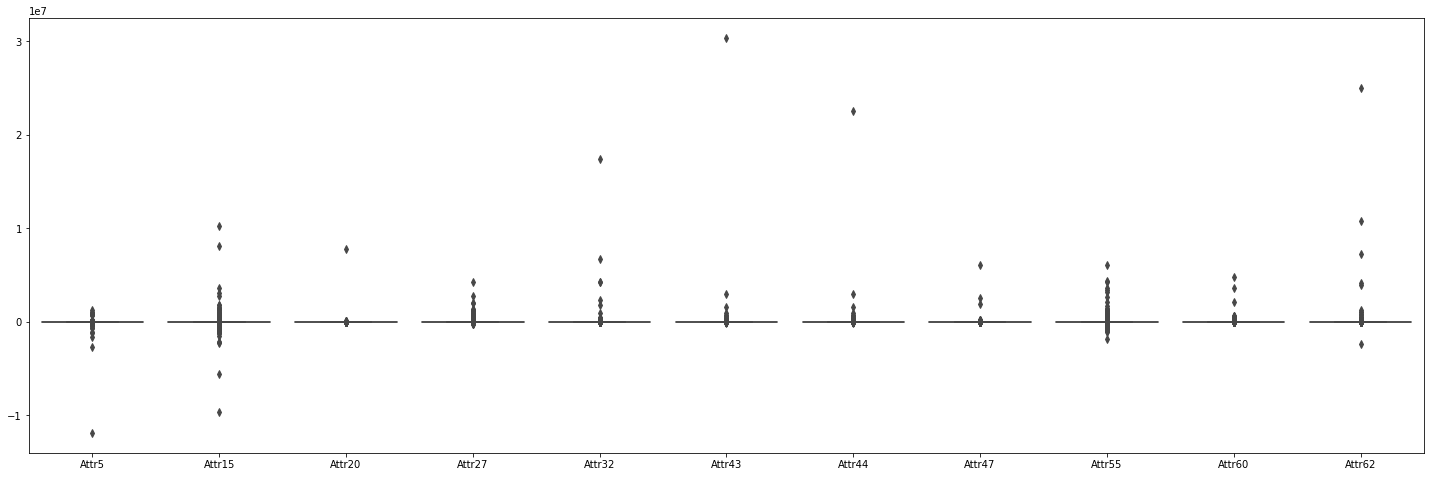

In [222]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)

sns.boxplot(data=outlier_df)

In [223]:
df_non_outliers = df.copy()
outlier_idx_list = []

for col in outlier_ft_list:

    min_abs = abs(df_non_outliers[col].min())
    max_abs = abs(df_non_outliers[col].max())

    if min_abs > max_abs:
        outlier_idx_list.append(df_non_outliers[col].idxmin())
    else:
        outlier_idx_list.append(df_non_outliers[col].idxmax())

print(outlier_idx_list)
# Remove duplicates
outlier_idx_list = list(set(outlier_idx_list))

for col in outlier_idx_list:
    df_non_outliers = df_non_outliers.drop(col)

df_non_outliers = df_non_outliers.loc[df_non_outliers['Attr15']!=df_non_outliers['Attr15'].max()]

[25437, 20035, 4721, 11023, 8780, 4721, 4721, 8780, 36665, 39724, 4721]


In [224]:
df_non_outliers.describe().iloc[[2]]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
std,2.994384,5.843284,5.439927,295.461733,21908.406844,7.201988,5.713601,505.940985,62.93853,14.671948,...,63610.623271,62.09994,13.675332,320.187021,122.1157,21989.633804,553.10048,70265.112547,124.188803,2369.534046


In [225]:
df_std = df_non_outliers.describe().iloc[[2]]
df_std = df_std.T
df_std.reset_index(inplace=True)

<AxesSubplot:xlabel='index', ylabel='std'>

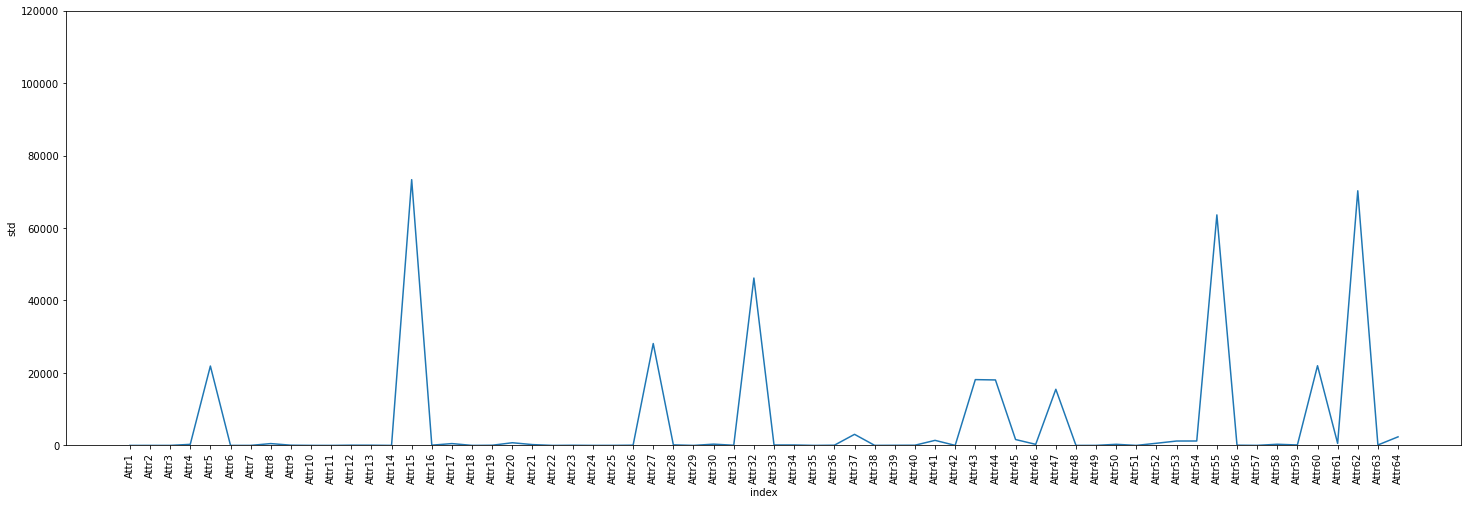

In [226]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, ax = plt.subplots(1, 1, figsize=a4_dims)
plt.xticks(rotation=90)
ax.set_ylim(0, 120000)

sns.lineplot(x="index", y="std", data=df_std)



## Modeling

### Imports

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [236]:
model_data = df.copy()
model_data = model_data.dropna()

### Feature data

In [237]:
feature_data = model_data.copy()

feature_data.drop(["class"], axis=1, inplace=True)
feature_data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.33050,1.1389,0.50494,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
8,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.58223,1.3332,0.36798,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.56030
12,0.266690,0.34994,0.611470,3.02430,43.087,0.559830,0.332070,1.85770,1.1268,0.65006,...,5340.0000,0.112500,0.410250,0.88750,0.073630,9.5593,5.6298,38.168,9.5629,33.41300
13,0.067731,0.19885,0.081562,2.95760,90.606,0.212650,0.078063,4.02900,1.2570,0.80115,...,15132.0000,0.204440,0.084542,0.79556,0.196190,8.2122,2.7917,60.218,6.0613,0.28803
14,-0.029182,0.21131,0.452640,7.57460,57.844,0.010387,-0.034653,3.73240,1.0241,0.78869,...,34549.0000,0.023565,-0.037001,0.97644,0.180630,3.4646,11.3380,31.807,11.4750,1.65110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43368,0.016964,0.75503,0.081574,1.12680,-197.070,0.002708,0.016964,0.32445,0.8879,0.24497,...,21426.0000,0.202530,0.069249,0.96847,0.028093,8.9614,4.8148,264.490,1.3800,3.22850
43369,0.118540,0.51946,0.376420,1.96150,-80.058,0.000000,0.118540,0.92506,1.1781,0.48054,...,2021.0000,0.126960,0.246670,0.88039,0.259280,1.9625,7.1645,121.300,3.0090,5.08030
43387,0.112350,1.73990,-0.514250,0.43445,-82.297,-0.322010,0.112350,-0.42524,3.4144,-0.73987,...,-1117.0000,-0.020766,-0.151850,0.96072,-1.122600,12.9690,32.4040,97.205,3.7549,5.64380
43388,-0.089739,1.33000,-0.314680,0.67454,-124.530,-1.260700,-0.089739,-0.24799,2.2327,-0.32981,...,-2204.0000,0.220300,0.272090,0.79435,-0.428730,4.9425,15.4680,158.060,2.3092,6.41950


### Target data

In [241]:
target_data = model_data['class']
target_data

0        0
8        0
12       0
13       0
14       0
        ..
43368    1
43369    1
43387    1
43388    1
43400    1
Name: class, Length: 19967, dtype: object

### Setup train and test sets

In [242]:
# Holdout
X_train,X_test,y_train,y_test = train_test_split(feature_data,target_data,test_size=0.10,random_state=0)

print("Size of modeling set (to be CV split): ", X_train.shape)
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test.shape)
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Size of modeling set (to be CV split):  (17970, 64)
0    17581
1      389
Name: class, dtype: int64
0    0.978353
1    0.021647
Name: class, dtype: float64
Size of hold back validation set:  (1997, 64)
0    1954
1      43
Name: class, dtype: int64
0    0.978468
1    0.021532
Name: class, dtype: float64


### Create scalar object

In [243]:
scalar_obj = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), feature_data.columns)],
                                          remainder='passthrough') # Default is to drop untransformed columns

### Define Models

In [244]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=50)
rf_ = RandomForestClassifier()

### Setup pipeline

In [245]:
pipeline = Pipeline([
    ('scaler', scalar_obj),
    ('classifier', rf_)
])

### Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    "classifier__n_estimators": [300, 500],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    "classifier__max_depth": [50, 100, 200],
    "classifier__criterion": ["gini", "entropy"],
}

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(pipeline, param_grid, scoring=score, n_jobs=-1)
    # clf = RandomizedSearchCV(rf, tuned_params, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

### Setup Scorer

In [ ]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro')
}

### CV using all variables...

In [247]:
model_res = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scorer, error_score="raise")

print("Precision(all models) = ",model_res['test_precision'])
print("Recall(all models) = ",model_res['test_recall'])
print("F1(all models) = ",model_res['test_F1'])

print("\n\n")

print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())

Precision(all models) =  [0.71204091 0.80827392 0.62589755 0.82329149 0.7396821 ]
Recall(all models) =  [0.52526319 0.54430297 0.51809311 0.53803492 0.5250722 ]
F1(all models) =  [0.54102022 0.57336925 0.52786197 0.56368457 0.54102022]



Mean Precision =  0.7418371933689552
Mean Recall =  0.5301532774133676
Mean F1 =  0.5493912455195357
